
# Data Cleaning and EDA.
<img src=https://img.freepik.com/premium-vector/it-specialists-administrate-cloud-service-data-storage-hosting-platform-big-data-processing-transferring-online-computing-technology-software-solutions-share-informations-digital-network_458444-974.jpg alt="Alternative text" />

## About Data Set
#### About this Dataset: Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

### Content       
- Show_id: Unique ID for every Movie / TV Show
- Type: Identifier - AMovie or TV Show

- Title: Title of the Movie or TV Show

- Director: Director of the Movie /TV Show

- Cast: ‘Actors involved in the Movie / TV Show

- Country:. ‘Country where the movie / show was produced
- Date_added: ‘Added date on Netflix

- Release_year: Actual release year of the Movie / TV Show
- Rating:. Rating type of the Movie or TV Show

- Duration: Total Duration - in minutes or number of seasons


In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


In [166]:
df=pd.read_csv(r'D:\Python__\Data Science_LNB\Assignment\Disney_Movies_Data\disney_plus_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [33]:
# Checking Out the missing Values.
df.isna().sum()


show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [34]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [35]:
# Converting the Date column into Datetime formate. 
df=df.astype({'date_added':'datetime64[ns]'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1231 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1450 non-null   object        
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 136.1+ KB


In [36]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!


In [37]:
# Delecting the missing value from these two columns(only 6 rows droped).
df=df.dropna(subset=["date_added","rating"])
df.shape

(1444, 12)

In [38]:
# Creating New columns form the Date column.
df["Year"]=df["date_added"].dt.year
df["Month"]=df["date_added"].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1449
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1444 non-null   object        
 1   type          1444 non-null   object        
 2   title         1444 non-null   object        
 3   director      976 non-null    object        
 4   cast          1255 non-null   object        
 5   country       1228 non-null   object        
 6   date_added    1444 non-null   datetime64[ns]
 7   release_year  1444 non-null   int64         
 8   rating        1444 non-null   object        
 9   duration      1444 non-null   object        
 10  listed_in     1444 non-null   object        
 11  description   1444 non-null   object        
 12  Year          1444 non-null   int64         
 13  Month         1444 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 169.2+ KB


In [39]:
# creatind the Two columns for seprating the Duration(in "Min","Season").
df.duration.unique()
#[for i in df.duration if i ]

array(['23 min', '91 min', '41 min', '94 min', '1 Season', '2 Seasons',
       '45 min', '59 min', '4 min', '10 Seasons', '2 min', '1 min',
       '8 min', '3 Seasons', '110 min', '11 min', '7 min', '95 min',
       '129 min', '14 min', '5 min', '134 min', '9 min', '30 min',
       '6 min', '22 min', '3 min', '87 min', '90 min', '93 min',
       '101 min', '132 min', '44 min', '131 min', '104 min', '5 Seasons',
       '52 min', '47 min', '53 min', '85 min', '92 min', '135 min',
       '4 Seasons', '105 min', '99 min', '32 Seasons', '88 min',
       '127 min', '106 min', '116 min', '42 min', '16 Seasons', '140 min',
       '19 Seasons', '66 min', '115 min', '137 min', '9 Seasons',
       '126 min', '82 min', '125 min', '54 min', '7 Seasons', '98 min',
       '102 min', '80 min', '170 min', '97 min', '112 min', '21 min',
       '20 min', '15 min', '19 min', '79 min', '6 Seasons', '89 min',
       '18 min', '81 min', '148 min', '121 min', '96 min', '109 min',
       '107 min', '86 min', '

In [40]:
# Creating differnt columns for series and movies time period.
'''Min,Season=[],[]
for i in df.duration:
    if "min" in i:
        Min.append(i)
    else:
        Min.append("0 min")'''

df["duration_min"]=[i if "min" in i else "0 min" for i in df.duration]
      
        
        
'''for i in df.duration:
    if "Seasons" in i:
        Season.append(i)
    else:
        Season.append("0 Season")'''

df["duration_Season"]=[i if "Season" in i else "0 Season" for i in df.duration]       
    

In [41]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,duration_min,duration_Season
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,11,23 min,0 Season
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,11,91 min,0 Season
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,11,23 min,0 Season


'TV-G': General audience. Suitable for all ages.

'PG': Parental guidance suggested. Some material may not be suitable for children.

'TV-PG': Parental guidance suggested for children. May contain material that parents may find unsuitable for younger children.

'PG-13': Parents strongly cautioned. Some material may be inappropriate for children under 13.

'TV-14': Parents strongly cautioned for children aged 14 and above. May contain content unsuitable for children under 14.

'G': General audience. All ages admitted.

'TV-Y7': Directed to children aged 7 and older. May be more appropriate for children who have reached the age of 7.

'TV-Y': Directed to young children.

'TV-Y7-FV': Directed to children aged 7 and older. Contains fantasy violence, which may be more intense or combative than other TV-Y7 programs.

"date_added": This attribute tells us when a particular movie or TV show was added to a specific streaming platform.
              It indicates when the content became accessible to users for streaming or viewing on that platform.

"release_year": This attribute represents the original release or premiere year of the movie or TV show.
It tells us when the content was first made available to the public, regardless of the platform or distribution method.

Text(0.5, 1.0, 'Number of Movies Released in Year')

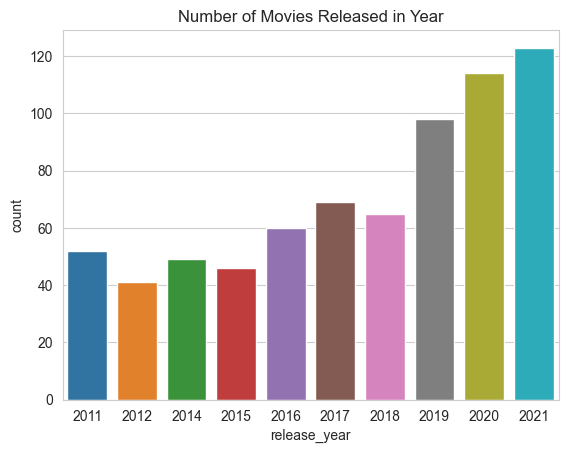

In [44]:
# Filterning Data on the bases of the release year and ploting the graph b/w year and movies or shows released.
p=df.release_year.groupby(df.release_year).count().sort_values(ascending=False).head(10).reset_index(name='count')
sns.barplot(data=p,x="release_year",y='count')
plt.title("Number of Movies Released in Year")

### 1.From This Information that tells that day by day Movies Content is increasing reapidly.
### 2.In Last 10 years the content is just double.
### 3.And Also that tells Market of movies are increasing so in future we can invest on that.

In [45]:
o=df.groupby(['listed_in','rating'])['rating'].count().sort_values(ascending=False).reset_index(name='count').head(15)

'''
'TV-G': General audience. Suitable for all ages.
'PG': Parental guidance suggested. Some material may not be suitable for children.
'TV-PG': Parental guidance suggested for children. May contain material that parents may find unsuitable for younger children.
'PG-13': Parents strongly cautioned. Some material may be inappropriate for children under 13.
'TV-14': Parents strongly cautioned for children aged 14 and above. May contain content unsuitable for children under 14.
'G': General audience. All ages admitted.
'TV-Y7': Directed to children aged 7 and older. May be more appropriate for children who have reached the age of 7.
'TV-Y': Directed to young children.
'TV-Y7-FV': Directed to children aged 7 and older. Contains fantasy violence, which may be more intense or combative than other TV-Y7 programs.'''
o

,listed_in,rating,count
0,"Animation, Comedy, Family",TV-G,66
1,"Animation, Comedy, Family",G,31
2,"Action-Adventure, Animation, Comedy",TV-Y7,30
3,"Action-Adventure, Animation, Kids",TV-Y7,26
4,"Animals & Nature, Docuseries, Family",TV-PG,25
5,"Action-Adventure, Animation, Family",G,24
6,"Animals & Nature, Documentary",TV-PG,22
7,"Animals & Nature, Documentary, Family",G,20
8,"Animation, Family",TV-G,18
9,"Action-Adventure, Animation, Comedy",G,18


Text(0.5, 1.0, 'Number of Movies Types')

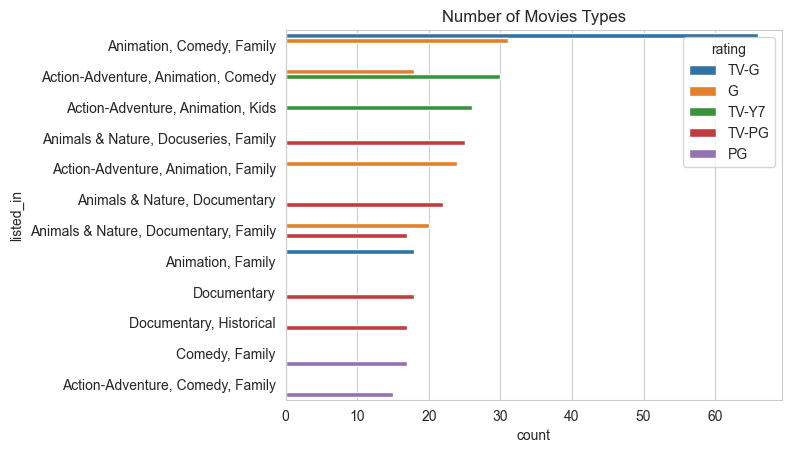

In [104]:
sns.barplot(data=o,x='count',y='listed_in',hue='rating')
plt.title("Number of Movies Types")

'TV-G': General audience. Suitable for all ages.
'PG': Parental guidance suggested. Some material may not be suitable for children.
'TV-PG': Parental guidance suggested for children. May contain material that parents may find unsuitable for younger children.
'PG-13': Parents strongly cautioned. Some material may be inappropriate for children under 13.
'TV-14': Parents strongly cautioned for children aged 14 and above. May contain content unsuitable for children under 14.
'G': General audience. All ages admitted.
'TV-Y7': Directed to children aged 7 and older. May be more appropriate for children who have reached the age of 7.
'TV-Y': Directed to young children.
'TV-Y7-FV': Directed to children aged 7 and older. Contains fantasy violence, which may be more intense or combative than other TV-Y7 programs.
### From this Info that most of the content is of Animation ,Comedy, Family .
### Mostly they are investing Money in Animation ,Comedy, Family content.

In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,duration_min,duration_Season
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,11,23 min,0 Season
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,11,91 min,0 Season
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,11,23 min,0 Season
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,11,41 min,0 Season
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,11,94 min,0 Season


In [48]:
u=np.array(df.groupby(['Month'])['Month'].count().reset_index(name="count"))
u[:,0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0.5, 1.0, 'Movies Released per Month')

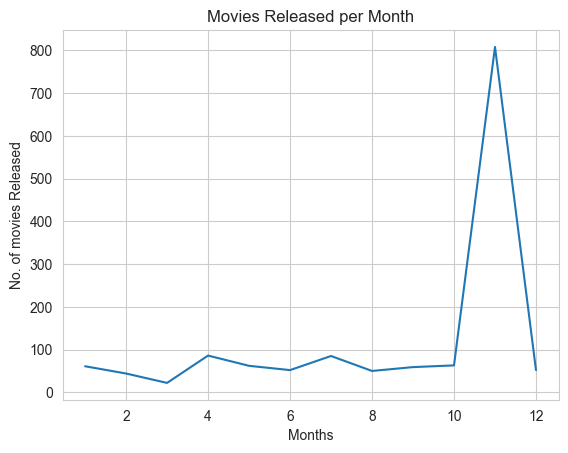

In [49]:
plt.plot(u[:,0],u[:,1])
plt.xlabel("Months")
plt.ylabel("No. of movies Released")
plt.title("Movies Released per Month")

### By this the Mostly movies are released in November or Decmber month .
### People are like to watch in this seasons because Most Holidays are that time .

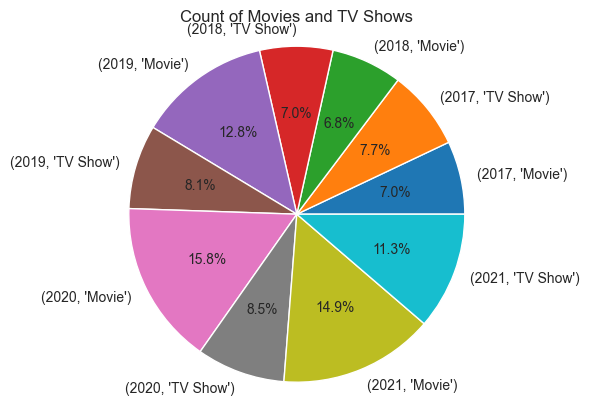

In [50]:
#grouped_t = df.groupby(["release_year",'type'])["release_year"].count().tail(10)

# Plotting a pie chart
plt.pie(df.groupby(["release_year",'type'])["release_year"].count().tail(10), labels=df.groupby(["release_year",'type'])["release_year"].count().tail(10).index, autopct='%1.1f%%')
plt.title('Count of Movies and TV Shows')
plt.axis('equal')
plt.show()

### This will show that Movies and TV Shows content are reapidly incresing Every Year in comparision of Previously year. .

In [59]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,duration_min,duration_Season
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,11,23 min,0 Season
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,11,91 min,0 Season


In [66]:
df.country.value_counts().sort_values(ascending=False).head(10)

United States                               1003
United States, Canada                         30
United Kingdom                                23
United States, United Kingdom                 22
Canada, United States                         17
United Kingdom, United States                 14
United States, Australia                       8
Canada                                         5
United States, United Kingdom, Australia       4
United States, France                          4
Name: country, dtype: int64

<AxesSubplot: xlabel='rating', ylabel='count'>

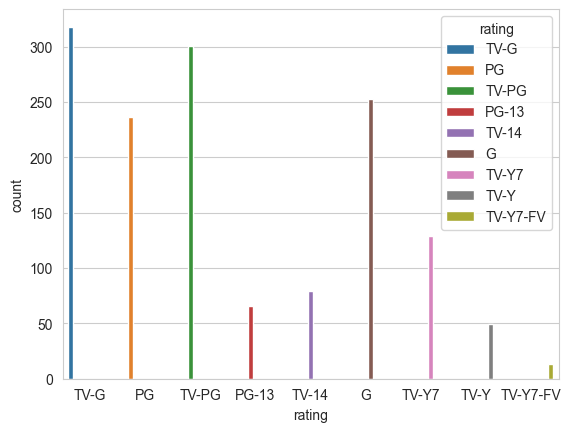

In [75]:
# Form this our content is mostly based on TV-G,TV-PG,G,PG.
sns.countplot(data=df,x='rating',hue='rating')

### Form this our content is mostly based on TV-G,TV-PG,G,PG.

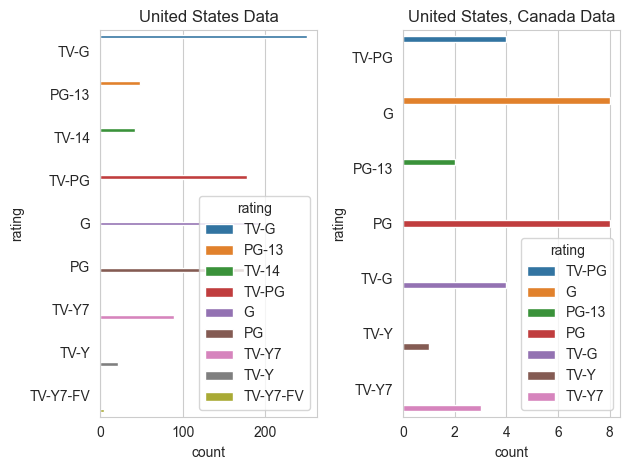

In [90]:
f,axes=plt.subplots(1,2)

sns.countplot(data=df[df["country"]=="United States"],y='rating',hue='rating' ,ax=axes[0])
sns.countplot(data=df[df["country"]=="United States, Canada"],y='rating',hue='rating',ax=axes[1])
axes[0].set_title("United States Data")
axes[1].set_title("United States, Canada Data")
# set spacing
f.tight_layout()

### US and Canada are creating Mostly : TV-G,TV-PG,G,PG.

Text(0.5, 1.0, 'Movie Vs TV Show')

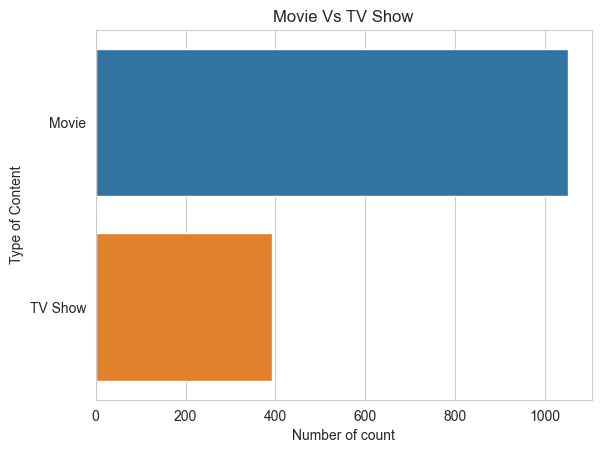

In [119]:
sns.barplot(data=df.type.value_counts().reset_index(name="count"),y="index",x='count')
plt.ylabel("Type of Content")
plt.xlabel('Number of count')
plt.title("Movie Vs TV Show")

In [164]:
#sns.histplot(data=df,x='rating',hue='type',)
fig = px.histogram(data_frame=df, x = ['rating'], color = 'type', title="Ratings of the Movies and TV-shows")
fig.show()

### This will be the data of Movies and TV Show based on Rating.